# Regression Neural Network

In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [27]:
#!pip install tensorflow
#!pip install keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [28]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(6, activation = 'tanh', input_dim = 5))

# Adding the second hidden layer
rnn.add(Dense(4, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [29]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.4715 - accuracy: 0.0000e+00
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3651 - accuracy: 0.0000e+00
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.0000e+00
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.0000e+00
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2333 - accuracy: 0.0000e+00
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2171 - accuracy: 0.0000e+00
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.0000e+00
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2003 - accuracy: 0.0000e+00
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.0000e+00
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss:

In [30]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

In [31]:
# Inversing scaling
#from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [37]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(0.234, 0.194)

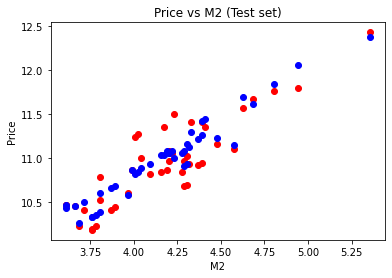

In [34]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], y_hat, 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()